### Imports

In [1]:
import joblib
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the saved model
best_model = joblib.load('nb_best_model.pkl')
X_test_cv = joblib.load('X_test_cv.pkl')
y_test = joblib.load('y_test.pkl')

### Model evaluation

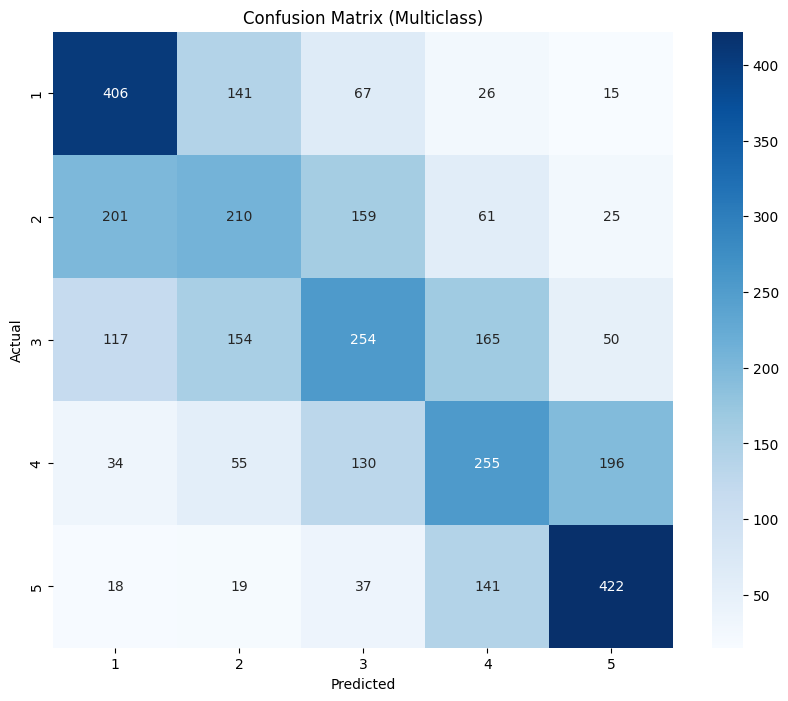

In [3]:
# Predict on the test set
y_pred = best_model.predict(X_test_cv)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title('Confusion Matrix (Multiclass)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<b>Comment: </b> The worest and best ratings (classes 1 and 5) show best clear-cut separation from other classes. The classification of the middle classes shows higher overlap with the surrounding classes. The model would likely benefit if classes were condensed into 2 (positive and negative) only.

In [4]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.52      0.62      0.57       655
           2       0.36      0.32      0.34       656
           3       0.39      0.34      0.37       740
           4       0.39      0.38      0.39       670
           5       0.60      0.66      0.63       637

    accuracy                           0.46      3358
   macro avg       0.45      0.47      0.46      3358
weighted avg       0.45      0.46      0.45      3358



<b>Comment: </b> The precision and recall are comparable by class. Rating 5 has the highest precision and recall, although still only 60% of samples classified as 5 really belonged to rating 5 and 66% of rating 5 samples were correctly classified. The rating 5 is closely followed by rating 1, but all the remaining ratings show poor precision and recall, confirming high leakage between these ratings.